In [104]:
#introduction to linear regression
#linear regression using gradient descent
#linear regression using OLS
#Linear Regression using Stochiastic gradient descent

# y = mx +c

#Where, y: dependent variable

#             x: independent variable

#           m: Slope of the line (For a unit increase in the quantity of X, Y increases by m.1 = m units.)

#           c: y intercept (The value of Y is c when the value of X is 0)

In [3]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(2)) 


        name mfr type  calories  protein  fat  sodium  fiber  carbo  sugars  \
0  100%_Bran   N    C        70        4    1     130   10.0    5.0       6   
1   All-Bran   K    C        70        4    1     260    9.0    7.0       5   

   potass  vitamins  shelf  weight  cups     rating  
0     280        25      3     1.0  0.33  68.402973  
1     320        25      3     1.0  0.33  59.425505  


In [5]:
newdf = df.loc[:,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
print(newdf.head())


   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1        70        4    1     260    9.0    7.0       5     320        25   
2        50        4    0     140   14.0    8.0       0     330        25   
3       110        3    3     140    4.0   10.0       7     160        25   
4       120        3    1     200    6.0   11.0      14     260        25   

      rating  
0  68.402973  
1  59.425505  
2  93.704912  
3  40.448772  
4  37.840594  


In [6]:
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf


In [38]:
# ordinary least squares (OLS)
#In statistics, ordinary least squares (OLS) is a type of linear least squares method 
#for estimating the unknown parameters in a linear regression model.


In [7]:
results = smf.ols('rating ~ calories + sugars', data=newdf).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     83.88
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           2.00e-19
Time:                        22:07:13   Log-Likelihood:                -256.38
No. Observations:                  74   AIC:                             518.8
Df Residuals:                      71   BIC:                             525.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.8505      5.658     15.704      0.0

In [13]:
#pip install pandasql

In [33]:
df2 = newdf.corr()
#print(df2) Index
x = df2.loc['rating']
#x = df2.loc[df2.loc['rating'] > 0.6]
print(x)
#ndf = x.DataFrame(x)

calories   -0.712054
protein     0.504070
fat        -0.407215
sodium     -0.409548
fiber       0.600230
carbo       0.055804
sugars     -0.760031
potass      0.410556
vitamins   -0.243780
rating      1.000000
Name: rating, dtype: float64


In [36]:
import pandasql as ps
q1 = "select * FROM df where rating > 80"
print(ps.sqldf(q1))

                        name mfr type  calories  protein  fat  sodium  fiber  \
0  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    8.0       0     330        25      3     1.0   0.5  93.704912  


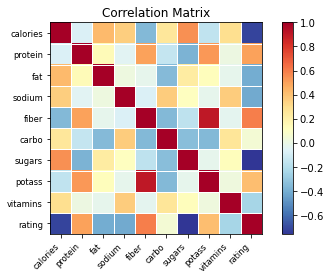

In [28]:
import statsmodels.graphics.api as smg
corr_matrix = np.corrcoef(newdf.T)
smg.plot_corr(corr_matrix, xnames=newdf.columns)
plt.show()

In [48]:
# Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')

x = np.array(df['calories']).reshape((-1, 1))
y = np.array(df['rating'])
reg = LinearRegression().fit(x, y)

reg

LinearRegression()

In [49]:
r_sq = reg.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5070207695168047


In [50]:
#When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².


In [51]:
print('intercept:', reg.intercept_)

intercept: 101.07125096674471


In [52]:
print('slope:', reg.coef_)

slope: [-0.55137093]


In [54]:
y_pred = reg.predict(x)
y_pred

array([62.47528587, 62.47528587, 73.50270447, 40.42044868, 34.90673938,
       34.90673938, 34.90673938, 40.42044868, 40.42044868, 40.42044868,
       29.39303008, 51.44786728, 51.44786728, 34.90673938, 40.42044868,
       34.90673938, 40.42044868, 40.42044868, 40.42044868, 45.93415798,
       40.42044868, 40.42044868, 45.93415798, 40.42044868, 45.93415798,
       45.93415798, 40.42044868, 40.42044868, 45.93415798, 34.90673938,
       40.42044868, 45.93415798, 40.42044868, 45.93415798, 40.42044868,
       34.90673938, 34.90673938, 40.42044868, 40.42044868, 40.42044868,
       23.87932078, 40.42044868, 45.93415798, 40.42044868, 45.93415798,
       12.85190218, 45.93415798, 34.90673938, 23.87932078, 51.44786728,
       29.39303008, 45.93415798, 73.50270447, 73.50270447, 45.93415798,
       45.93415798, 45.93415798, 51.44786728, 40.42044868, 40.42044868,
       56.96157657, 51.44786728, 51.44786728, 40.42044868, 40.42044868,
       51.44786728, 40.42044868, 23.87932078, 45.93415798, 40.42

In [55]:
y_pred = reg.intercept_ + reg.coef_ * x

In [65]:
# pandas DF - ADD NEW COLUMN OF PREDICTION
# Original Rating, Predict Rating
df['pred_rating'] = y_pred
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,pred_rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,62.475286
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,62.475286
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,73.502704
3,Cracklin'_Oat_Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772,40.420449
4,Post_Nat._Raisin_Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,34.906739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.00,0.75,39.106174,40.420449
70,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.00,1.00,27.753301,40.420449
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.00,0.67,49.787445,45.934158
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.00,1.00,51.592193,45.934158


In [61]:
x = np.array(df.loc[:,['calories','sugars']]).reshape((-1, 2))
y = np.array(df['rating'])
Mreg = LinearRegression().fit(x, y)

Mreg

LinearRegression()

In [62]:
r_sq = Mreg.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7026335448146463


In [64]:
r_sq = Mreg.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', Mreg.intercept_)

print('slope:', Mreg.coef_)

coefficient of determination: 0.7026335448146463
intercept: 88.85052181293153
slope: [-0.32719027 -1.68965472]


In [66]:
# Other Method

In [67]:
# X = feature values, all the columns except the last column
X = newdf.iloc[:, [0,1,4,6]]
# y = target values, last column of the data frame
y = newdf.iloc[:, -1]
X.head()

,calories,protein,fiber,sugars
0,70,4,10.0,6
1,70,4,9.0,5
2,50,4,14.0,0
3,110,3,4.0,7
4,120,3,6.0,14


In [68]:
split = int(0.8*len(newdf))
X_train, X_test, Y_train, Y_test = X[:split], X[split:], y[:split], y[split:]

#import numpy as np
#from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

In [69]:
reg.score(X, y)

0.8576570757842814

In [70]:
newpred = reg.predict(X_test)
#type(newpred)
xyz = pd.DataFrame(newpred)

In [72]:
df_new = pd.concat([X_test, Y_test], axis=1)
# Original Rating, Predict Rating
df_new['pred_rating'] = newpred
df_new

,calories,protein,fiber,sugars,rating,pred_rating
59,110,2,0.0,3,40.560159,41.673169
60,80,2,3.0,0,68.235885,58.714363
61,90,3,4.0,0,74.472949,60.203765
62,90,3,3.0,0,72.801787,58.268430
63,110,2,1.0,15,31.230054,26.485806
64,110,6,1.0,3,53.131324,51.097456
65,90,2,3.0,5,59.363993,49.261734
66,110,2,0.0,3,38.839746,41.673169
67,140,3,4.0,14,28.592785,28.636429
68,100,3,3.0,3,46.658844,51.669584


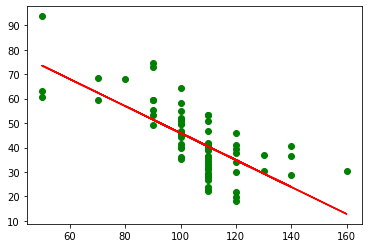

In [95]:
# any one variable in X for pLot
#SCATTER PLOT
# indentation
#for i in range(0,9):
X = newdf.iloc[:, [0]].values.reshape(-1, 1)  # values converts it into a numpy array
Y = newdf.iloc[:, 9].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y, color='green')
plt.plot(X, Y_pred, color='red')
plt.show()

In [97]:
# linear regression using gradient descent
# Loss Function
#The loss is the error in our predicted value of m and c. 
#Our goal is to minimize this error to obtain the most accurate value of m and c.
#We will use the Mean Squared Error function to calculate the loss. 

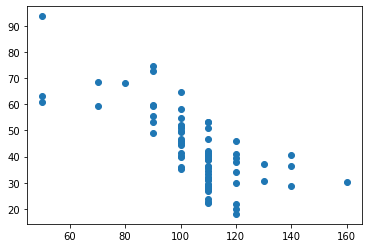

In [98]:
# Gradient descent is an iterative optimization algorithm to find the minimum of a function. 
X = newdf.iloc[:, 0]
Y =  newdf.iloc[:, 9]
plt.scatter(X, Y)
plt.show()

In [99]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

-7.367824961649988e+111 -6.776923752037206e+109


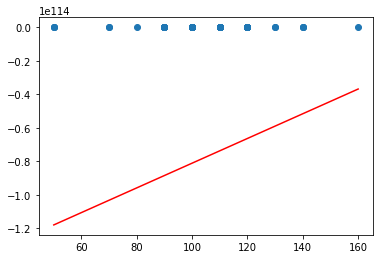

In [102]:
# Making predictions
m = -7.367824961649988e+111 
c = -6.776923752037206e+109
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [105]:
# Stochastic Gradient Descent

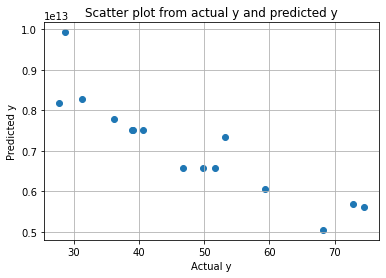

Mean Squared Error : 5.162542481172478e+25


In [111]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

n_iter=100
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(X_train, Y_train)
y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(Y_test, y_pred_sksgd))